# Cats and dogs predcito using vgg16

In [ ]:
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization, MaxPool2D ,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train=ImageDataGenerator(rescale=1./255,
                            rotation_range=5,
                            zoom_range=.2,
                            horizontal_flip=True,validation_split=0.2)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
!unzip -q "/content/drive/MyDrive/DogVsCat/test_set.zip" -d "/content/drive/MyDrive/Datasets"
!unzip -q "/content/drive/MyDrive/DogVsCat/training_set.zip" -d "/content/drive/MyDrive/Datasets"

In [ ]:
train_data=train.flow_from_directory('/content/drive/MyDrive/Datasets/training_set',color_mode='rgb',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='binary',
                                        shuffle=True,subset="training")
test_data=test.flow_from_directory('/content/drive/MyDrive/Datasets/test_set',color_mode='rgb',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='binary',
                                        shuffle=True)
val_data=train.flow_from_directory('/content/drive/MyDrive/Datasets/training_set',color_mode='rgb',
                                        target_size=(224,224),
                                        batch_size=32,
                                        class_mode='binary',
                                        shuffle=True,subset="validation")

Found 6404 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [ ]:
6404//32

200

## Plots

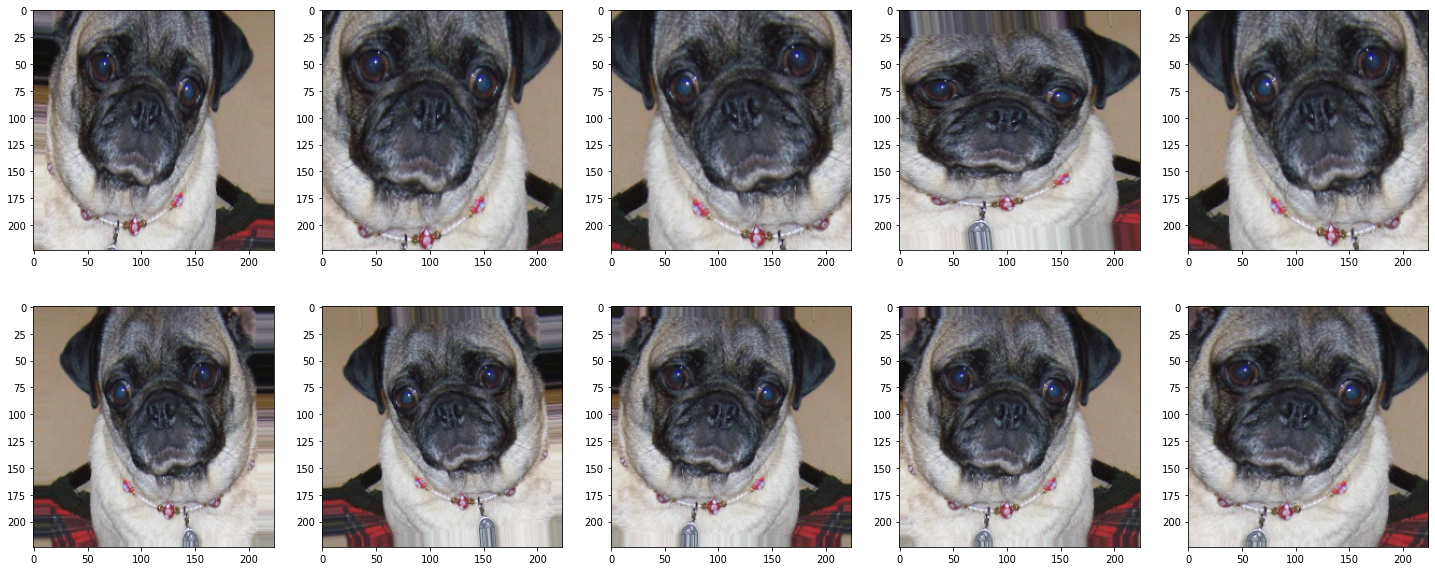

In [ ]:
rows = 2
columns = 5
fig = plt.figure(figsize=(25, 10))
for k in range(0,10):
  fig.add_subplot(rows, columns, k+1)
  plt.imshow(train_data[0][0][0])

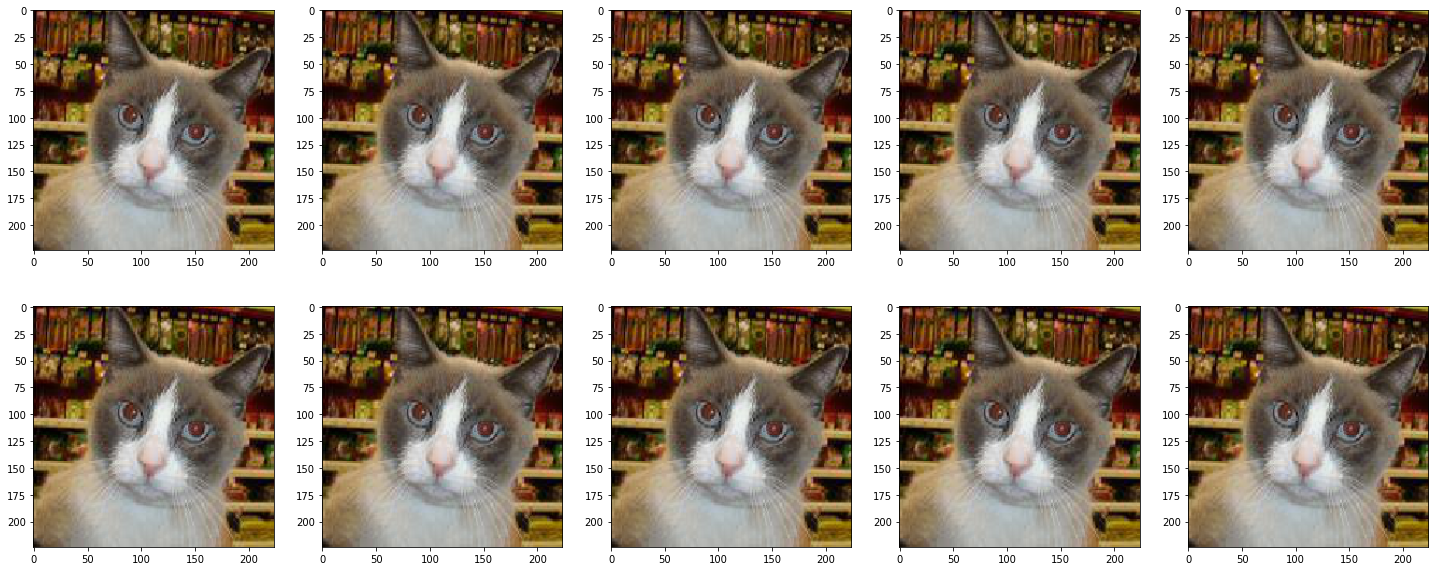

In [ ]:
rows = 2
columns = 5
fig = plt.figure(figsize=(25, 10))
for k in range(0,10):
  fig.add_subplot(rows, columns, k+1)
  plt.imshow(test_data[0][0][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


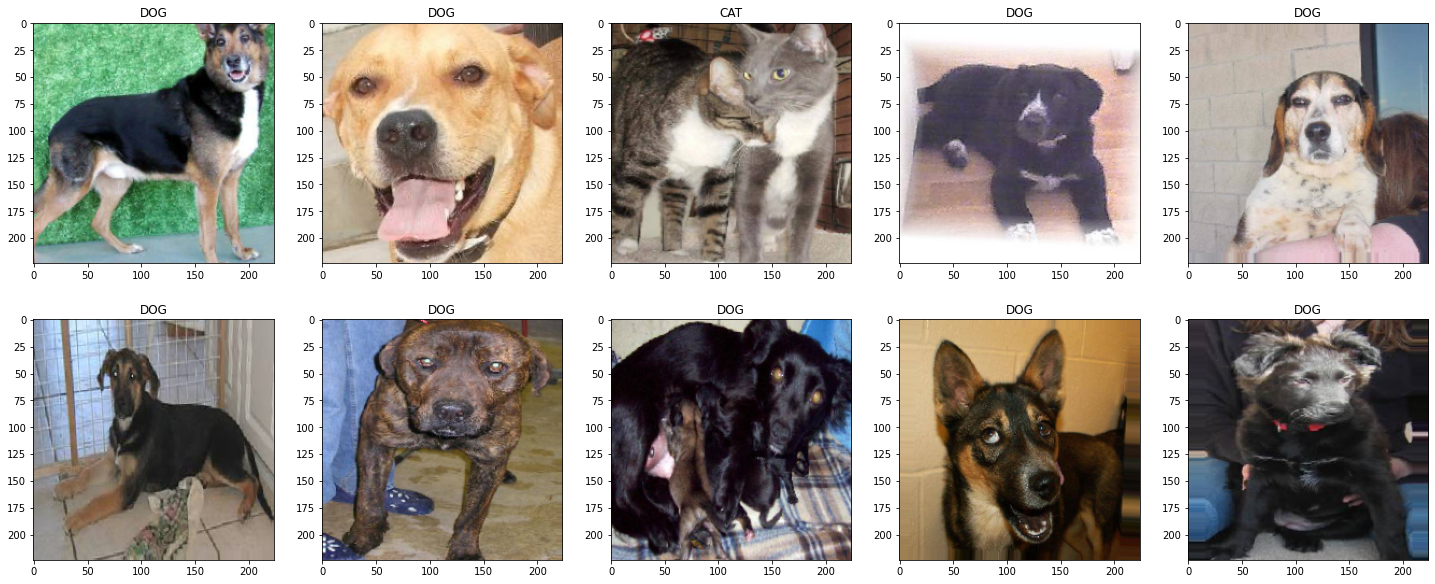

In [ ]:

import random
fig = plt.figure(figsize=(25, 10))
#randomlist = random.sample(range(10, 30), 10)
rows = 2
columns = 5
for j in range(0,10):
  for i in random.sample(range(0, 200), 10):
    fig.add_subplot(rows, columns, j+1)
    aa=train_data[i][1][0]
    if aa == 0.0:
      plt.title("CAT")
    else:
      plt.title("DOG")
    plt.imshow(train_data[i][0][0])
  #print(i)

## Model building (vgg16 pretrained)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
#model = VGG16(weights='imagenet')

In [ ]:
for layer in model.layers:
    layer.trainable = False

In [ ]:
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten



x = Flatten()(model.output)
x=Dense(256,activation='relu')(x)
prediction=Dense(1, activation='sigmoid')(x)
model = Model(inputs=model.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [ ]:
len(train_data)//32

6

In [ ]:
# fit the model
history = model.fit(
 train_data,
  
  validation_data=val_data,
  epochs=20,steps_per_epoch=len(train_data),
  callbacks=[early_stop,checkpoint],
  batch_size=32,shuffle=True)

Epoch 1/20
201/201 [==============================] - ETA: 0s - loss: 0.4350 - accuracy: 0.8484

201/201 [==============================] - 133s 594ms/step - loss: 0.4350 - accuracy: 0.8484 - val_loss: 0.2269 - val_accuracy: 0.9038
Epoch 2/20
201/201 [==============================] - ETA: 0s - loss: 0.1962 - accuracy: 0.9176

201/201 [==============================] - 121s 600ms/step - loss: 0.1962 - accuracy: 0.9176 - val_loss: 0.2173 - val_accuracy: 0.9088
Epoch 3/20
201/201 [==============================] - ETA: 0s - loss: 0.1931 - accuracy: 0.9211

201/201 [==============================] - 113s 564ms/step - loss: 0.1931 - accuracy: 0.9211 - val_loss: 0.1874 - val_accuracy: 0.9238
Epoch 4/20
201/201 [==============================] - ETA: 0s - loss: 0.1768 - accuracy: 0.9260

201/201 [==============================] - 115s 572ms/step - loss: 0.1768 - accuracy: 0.9260 - val_loss: 0.2146 - val_accuracy: 0.9138
Epoch 5/20
201/201 [==============================] - ETA: 0s - loss: 0.1450 - accuracy: 0.9383

201/201 [==============================] - 114s 565ms/step - loss: 0.1450 - accuracy: 0.9383 - val_loss: 0.1854 - val_accuracy: 0.9275
Epoch 6/20
201/201 [==============================] - ETA: 0s - loss: 0.1304 - accuracy: 0.9453

201/201 [==============================] - 113s 563ms/step - loss: 0.1304 - accuracy: 0.9453 - val_loss: 0.1898 - val_accuracy: 0.9269
Epoch 7/20
201/201 [==============================] - ETA: 0s - loss: 0.1314 - accuracy: 0.9464

201/201 [==============================] - 113s 563ms/step - loss: 0.1314 - accuracy: 0.9464 - val_loss: 0.1861 - val_accuracy: 0.9207
Epoch 8/20
201/201 [==============================] - ETA: 0s - loss: 0.1234 - accuracy: 0.9493

201/201 [==============================] - 113s 561ms/step - loss: 0.1234 - accuracy: 0.9493 - val_loss: 0.2045 - val_accuracy: 0.9188
Epoch 9/20
201/201 [==============================] - ETA: 0s - loss: 0.1191 - accuracy: 0.9496

201/201 [==============================] - 113s 562ms/step - loss: 0.1191 - accuracy: 0.9496 - val_loss: 0.1809 - val_accuracy: 0.9325
Epoch 10/20
201/201 [==============================] - ETA: 0s - loss: 0.1084 - accuracy: 0.9586

201/201 [==============================] - 113s 561ms/step - loss: 0.1084 - accuracy: 0.9586 - val_loss: 0.1921 - val_accuracy: 0.9275
Epoch 11/20
201/201 [==============================] - ETA: 0s - loss: 0.1021 - accuracy: 0.9596

201/201 [==============================] - 112s 559ms/step - loss: 0.1021 - accuracy: 0.9596 - val_loss: 0.1965 - val_accuracy: 0.9282
Epoch 12/20
201/201 [==============================] - ETA: 0s - loss: 0.0946 - accuracy: 0.9622

201/201 [==============================] - 113s 562ms/step - loss: 0.0946 - accuracy: 0.9622 - val_loss: 0.2080 - val_accuracy: 0.9238
Epoch 13/20
201/201 [==============================] - ETA: 0s - loss: 0.0871 - accuracy: 0.9647

201/201 [==============================] - 112s 557ms/step - loss: 0.0871 - accuracy: 0.9647 - val_loss: 0.2294 - val_accuracy: 0.9275
Epoch 14/20
201/201 [==============================] - ETA: 0s - loss: 0.0844 - accuracy: 0.9641

201/201 [==============================] - 112s 557ms/step - loss: 0.0844 - accuracy: 0.9641 - val_loss: 0.2350 - val_accuracy: 0.9194
Epoch 14: early stopping


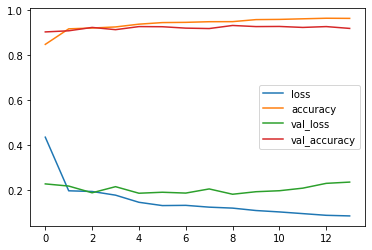

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
_, accuracy = history.model.evaluate(test_data)
print("Model accuracy: %.2f"% (accuracy*100))

64/64 [==============================] - 12s 181ms/step - loss: 0.2256 - accuracy: 0.9278
Model accuracy: 92.78


In [ ]:
y_pred =  model.predict_generator(test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
threshold = 0.5
y_final = np.where(y_pred > threshold, 1,0)

In [ ]:
np.unique(y_final)

array([0, 1])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
confusion_matrix(test_data.classes,y_final)

array([[528, 483],
       [527, 485]])

In [ ]:
test_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
print(classification_report(test_data.classes,y_final))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1011
           1       0.50      0.48      0.49      1012

    accuracy                           0.50      2023
   macro avg       0.50      0.50      0.50      2023
weighted avg       0.50      0.50      0.50      2023



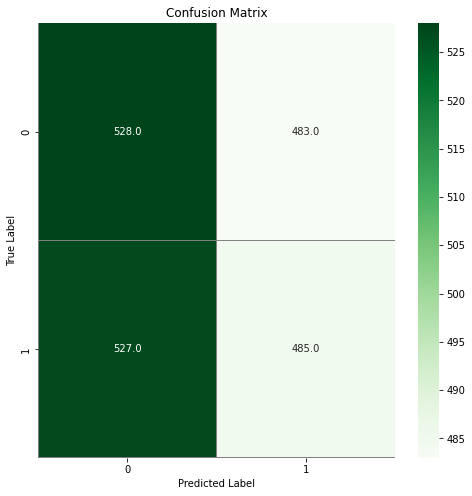

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(test_data.classes,y_final) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
len(test_data)

64

## predicting in the dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


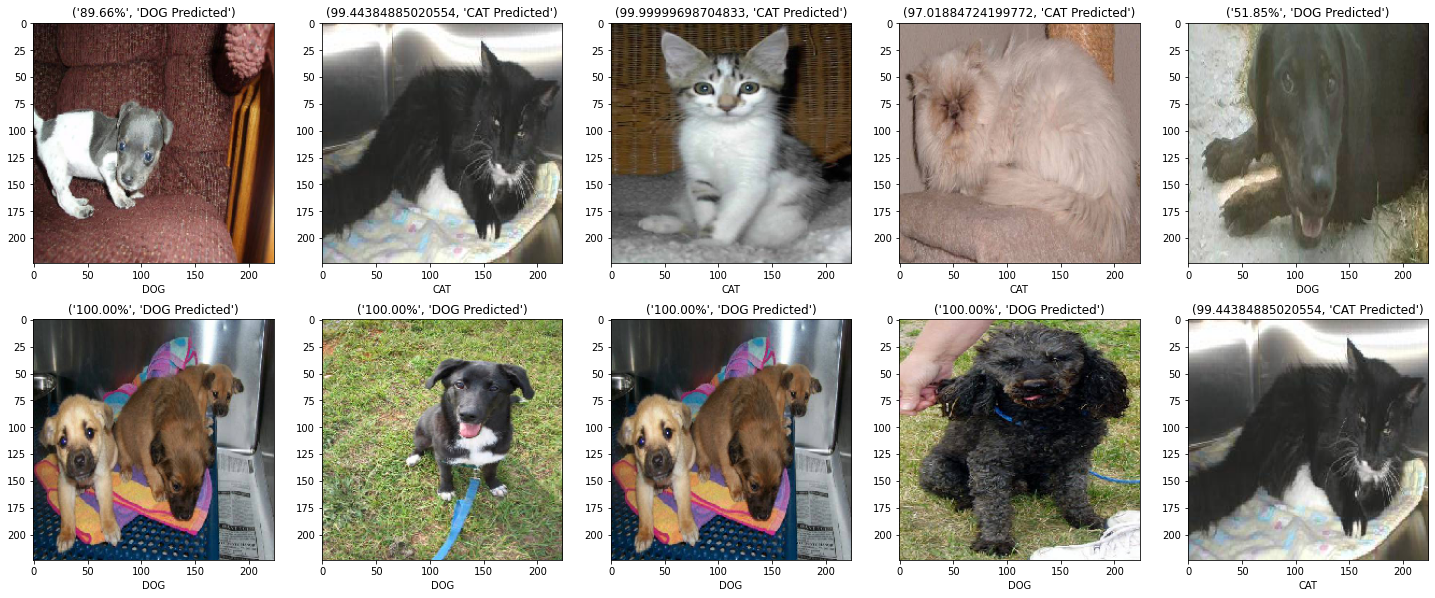

In [ ]:

import random
fig = plt.figure(figsize=(25, 10))
#randomlist = random.sample(range(10, 30), 10)
rows = 2
columns = 5
for j in range(0,10):
  for i in random.sample(range(0,len(test_data)), 10):
    fig.add_subplot(rows, columns, j+1)
    aa=test_data[i][1][0]
    bb=test_data[i][0][0]
    bb=np.expand_dims(bb,axis=0)
    z=model.predict(bb)
    zz=(1-(z[0][0]))*100,"CAT Predicted"
    yy="{:.2f}%".format(z[0][0]*100),"DOG Predicted"
    if aa==0.0:
      plt.xlabel("CAT")
    else:
      plt.xlabel("DOG")
    if z>0.5:
      plt.title(yy)
    else:
      plt.title(zz)
    plt.imshow(test_data[i][0][0])
  #print(i)

##input a external image to predct

In [ ]:
#prediction


from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np

In [ ]:
img_path = '/content/5ce5e2ceac058952506371f624c27e8f.jpg'
img = image.load_img(img_path, target_size=(224, 224),color_mode='rgb')

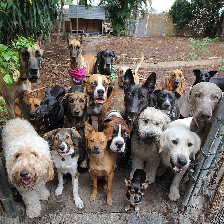

In [ ]:
display(img)

In [ ]:
x = image.img_to_array(img)


x = np.expand_dims(x, axis=0)

x.shape

(1, 224, 224, 3)

In [ ]:
x = preprocess_input(x)

In [ ]:
len(x)

1

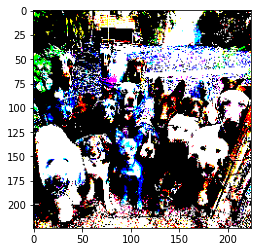

In [ ]:
plt.imshow(x[0])

In [ ]:
features= model.predict(x)

In [ ]:
z=model.predict_generator(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
z

array([[1.]], dtype=float32)

In [ ]:
features

array([[1.]], dtype=float32)

In [ ]:
type(features)

numpy.ndarray

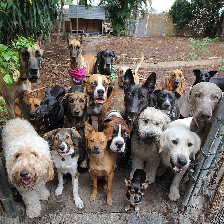

Dog


In [ ]:
display(img)
if features == 1:
  print("Dog")
else:
  print("Cat")